### Summary
By leaving the classes as they are:
- With TTS the F1 score ist between 41 and 45 (50 and 65); 10 fold CV comes to 0.43 (0.54), LOOCV comes to 0.43 (0.55) as well
- Because it is computanioally feasible, LOOCV is used
- By transforming the data via logarithm, the F1 score grows to 0.48 (0.56)
- With PCA the results are much worse: 0.35 (0.44)
- For the white wine: by removing every feature except of colatile acidity, sulphates and alcohol, the F1 score grows to 49 for normal data
- For the red wine only leaving volatile acidity, chlorides, total sulfur dioxide, sulphates and alcohol scores 0.58
- Normalising the data does not improve the classification


- I shortly tried out some other algorithms and Random Forrest classifier brought an F1 of 0.64 (0.63)
- I also shortly tried a ordinal logistic regression classifier which also brougth me to an F1 of 0.48 (0.56)

- I did not manage to deal with imbalanced classes by now


By transforming the classes to High, Middle and Low:
- With TTS the F1 score ist between 85 and 90 (87 and 95), with values from 0.05 to 0.40 in the hugh and low classes
- 10 Fold CV brings 0.26/0.93/0.14 (0.22/0.95/0.17) and LOOCV brings 0.25/0.93/0.18 (0.19/0.94/0.09)

- Because it is computanioally feasible, LOOCV is used
- By transforming the data via logarithm, we get 0.29/0.95/0.17 (0.10/0.96/0.04)
- With PCA the results are much worse: 0.06/0.96/0.00 (0.44)
- For the white wine: removing features did not bring much, for the red as well
- Normalising the data: 0.25/0.93/0.18 (0.19/0.94/0.08)


- I shortly tried out some other algorithms and Random Forrest classifier brought 0.28/0.97/0.45 (0.08/0.97/0.19)
- I also shortly tried a ordinal logistic regression classifier which also brougth me to 0.01/0.96/0.00 (0.00/0.97/0.00)

- I did not manage to deal with imbalanced classes by now

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from copy import deepcopy
from scipy.stats import iqr

In [3]:
red = pd.read_csv("./data/winequality-white1.csv")
#red.head()

In [82]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Choosing data


In [4]:
data_normal = deepcopy(red)
label_normal = data_normal.pop("quality")

In [5]:
label_normal.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

In [6]:
data_class = deepcopy(red)

conditions = [(data_class['quality'] <= 4),
              (data_class['quality'] >= 8)]
choices = ['1 - low', '3 - high']
data_class['quality class'] = np.select(conditions, choices, default = '2 - middle')


label_class = data_class.pop("quality")
label_class = data_class.pop("quality class")


In [86]:
data_class.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


## Naive Bayes

https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/:
Pros:

- It is easy and fast to predict class of test data set. It also perform well in multi class prediction
- When assumption of independence holds, a Naive Bayes classifier performs better compare to other models like logistic regression and you need less training data.
- It perform well in case of categorical input variables compared to numerical variable(s). For numerical variable, normal distribution is assumed (bell curve, which is a strong assumption).

Cons:

- If categorical variable has a category (in test data set), which was not observed in training data set, then model will assign a 0 (zero) probability and will be unable to make a prediction. This is often known as “Zero Frequency”. To solve this, we can use the smoothing technique. One of the simplest smoothing techniques is called Laplace estimation.
- On the other side naive Bayes is also known as a bad estimator, so the probability outputs from predict_proba are not to be taken too seriously.
- Another limitation of Naive Bayes is the assumption of independent predictors. In real life, it is almost impossible that we get a set of predictors which are completely independent.
 

In [7]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneOut
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
def confusion_matrix_report(y_true, y_pred):    
    cm, labels = confusion_matrix(y_true, y_pred), unique_labels(y_true, y_pred)
    column_width = max([len(str(x)) for x in labels] + [5])  # 5 is value length
    report = " " * column_width + " " + "{:_^{}}".format("Prediction", column_width * len(labels))+ "\n"
    report += " " * column_width + " ".join(["{:>{}}".format(label, column_width) for label in labels]) + "\n"
    for i, label1 in enumerate(labels):
        report += "{:>{}}".format(label1, column_width) + " ".join(["{:{}d}".format(cm[i, j], column_width) for j in range(len(labels))]) + "\n"
    return report

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Train/test-split vs. Stratified 10-fold Cross-Validation vs. LOOCV

k-fold-CrossValidation
-	Importantly, each observation in the data sample is assigned to an individual group and stays in that group for the duration of the procedure. This means that each sample is given the opportunity to be used in the hold out set 1 time and used to train the model k-1 times.
-	It is also important that any preparation of the data prior to fitting the model occur on the CV-assigned training dataset within the loop rather than on the broader data set. This also applies to any tuning of hyperparameters. A failure to perform these operations within the loop may result in data leakage and an optimistic estimate of the model skill.

Configuration of k
- A poorly chosen value for k may result in a mis-representative idea of the skill of the model, such as a score with a high variance (that may change a lot based on the data used to fit the model), or a high bias, (such as an overestimate of the skill of the model).

Three common tactics for choosing a value for k are as follows:
-	Representative: The value for k is chosen such that each train/test group of data samples is large enough to be statistically representative of the broader dataset.
-	k=10: The value for k is fixed to 10, a value that has been found through experimentation to generally result in a model skill estimate with low bias a modest variance.
-	k=n: The value for k is fixed to n, where n is the size of the dataset to give each test sample an opportunity to be used in the hold out dataset. This approach is called leave-one-out cross-validation.
It is preferable to split the data sample into k groups with the same number of samples, such that the sample of model skill scores are all equivalent!

Reasons for cross-validation:
-	avoids overfitting
-	all available data is used for training, equal splits because stratified, everyone is represented


In [243]:
train_data, test_data, train_label, test_label = train_test_split(data_normal, label_normal, test_size=0.10)

model = GaussianNB().fit(train_data, train_label)
prediction = model.predict(test_data)

print(confusion_matrix(test_label, prediction))  
print(classification_report(test_label, prediction)) 

[[  0   5   0]
 [ 10 139   5]
 [  0   1   0]]
             precision    recall  f1-score   support

    1 - low       0.00      0.00      0.00         5
 2 - middle       0.96      0.90      0.93       154
   3 - high       0.00      0.00      0.00         1

avg / total       0.92      0.87      0.89       160



In [245]:
cross_val = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
prediction_val = cross_val_predict(model, data_normal, label_normal, cv=10)

print(confusion_matrix_report(label_normal, prediction_val))
print(accuracy_score(label_normal, prediction_val))
print(classification_report(label_normal, prediction_val))

           __________Prediction__________
             1 - low 2 - middle   3 - high
   1 - low        14         48          1
2 - middle        53       1430         35
  3 - high         0         15          3

0.9049405878674172
             precision    recall  f1-score   support

    1 - low       0.21      0.22      0.22        63
 2 - middle       0.96      0.94      0.95      1518
   3 - high       0.08      0.17      0.11        18

avg / total       0.92      0.90      0.91      1599



In [246]:
k_fold = KFold(len(label_normal), shuffle=True, random_state=0)
clf = GaussianNB()

prediction_val = cross_val_predict(clf, data_normal, label_normal, cv=k_fold, n_jobs=1)

print(confusion_matrix_report(label_normal, prediction_val))
print(accuracy_score(label_normal, prediction_val))
print(classification_report(label_normal, prediction_val))

           __________Prediction__________
             1 - low 2 - middle   3 - high
   1 - low        13         50          0
2 - middle        60       1409         49
  3 - high         0         15          3

0.8911819887429644
             precision    recall  f1-score   support

    1 - low       0.18      0.21      0.19        63
 2 - middle       0.96      0.93      0.94      1518
   3 - high       0.06      0.17      0.09        18

avg / total       0.92      0.89      0.90      1599



## Trying to improve the power of Naive Bayes

https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/:
- If continuous features do not have normal distribution, we should use transformation or different methods to convert it in normal distribution.
- If test data set has zero frequency issue, apply smoothing techniques “Laplace Correction” to predict the class of test data set.
- Remove correlated features, as the highly correlated features are voted twice in the model and it can lead to over inflating importance.
- Naive Bayes classifiers has limited options for parameter tuning like alpha=1 for smoothing, fit_prior=[True|False] to learn class prior probabilities or not and some other options (look at detail here). I would recommend to focus on your  pre-processing of data and the feature selection.
- You might think to apply some classifier combination technique like ensembling, bagging and boosting but these methods would not help. Actually, “ensembling, boosting, bagging” won’t help since their purpose is to reduce variance. Naive Bayes has no variance to minimize.

Naive Bayes verbessern:
- Fisher method
- One against many approach bei classess
- Tuning
- Ensembling, Boosting, bagging, etc.

### One against many approach

In [64]:
data_low = deepcopy(red)

conditions = [(data_low['quality'] <= 4),
              (data_low['quality'] >= 5)]
choices = ['1 - low', '0 - Rest ']
data_low['quality class'] = np.select(conditions, choices, default = "0")


label_low = data_low.pop("quality")
label_low = data_low.pop("quality class")


count          4898
unique            2
top       0 - Rest 
freq           4715
Name: quality class, dtype: object

### Some more classifiers
https://www.kaggle.com/jeffd23/10-classifier-showdown-in-scikit-learn

In [32]:
train_data, test_data, train_label, test_label = train_test_split(data_normal, label_normal, test_size=0.10)

model = GaussianNB().fit(train_data, train_label)
prediction = model.predict(test_data)

print(confusion_matrix(test_label, prediction))  
print(classification_report(test_label, prediction)) 

[[ 0  0  0  0  0  0]
 [ 0  5  5  7  5  1]
 [ 3  8 88 40 15  0]
 [ 2  3 46 78 87  1]
 [ 0  0  7 18 58  1]
 [ 1  0  2  1  7  1]]
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         0
          4       0.31      0.22      0.26        23
          5       0.59      0.57      0.58       154
          6       0.54      0.36      0.43       217
          7       0.34      0.69      0.45        84
          8       0.25      0.08      0.12        12

avg / total       0.51      0.47      0.47       490



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [8]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

k_fold = KFold(len(label_normal), shuffle=True, random_state=0)

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    prediction_val = cross_val_predict(clf, data_normal, label_normal, cv=k_fold, n_jobs=1)
    name = clf.__class__.__name__

    
    print("="*30)
    print(name)
    
    print('****Results****')
    acc = accuracy_score(label_normal, prediction_val)
    print("Accuracy: {:.4%}".format(acc))
    print(classification_report(label_normal, prediction_val)) 

KNeighborsClassifier
****Results****
Accuracy: 46.8763%
             precision    recall  f1-score   support

          3       0.05      0.05      0.05        20
          4       0.14      0.19      0.16       163
          5       0.44      0.47      0.46      1457
          6       0.54      0.56      0.55      2198
          7       0.44      0.37      0.40       880
          8       0.35      0.14      0.20       175
          9       0.00      0.00      0.00         5

avg / total       0.47      0.47      0.47      4898



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC
****Results****
Accuracy: 44.8755%
             precision    recall  f1-score   support

          3       0.00      0.00      0.00        20
          4       0.00      0.00      0.00       163
          5       0.00      0.00      0.00      1457
          6       0.45      1.00      0.62      2198
          7       0.00      0.00      0.00       880
          8       0.00      0.00      0.00       175
          9       0.00      0.00      0.00         5

avg / total       0.20      0.45      0.28      4898

DecisionTreeClassifier
****Results****
Accuracy: 58.1462%
             precision    recall  f1-score   support

          3       0.00      0.00      0.00        20
          4       0.27      0.26      0.26       163
          5       0.61      0.60      0.61      1457
          6       0.64      0.63      0.63      2198
          7       0.51      0.54      0.52       880
          8       0.37      0.42      0.39       175
          9       0.00      0.00      0.00         

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


RandomForestClassifier
****Results****
Accuracy: 63.8016%
             precision    recall  f1-score   support

          3       0.00      0.00      0.00        20
          4       0.39      0.16      0.23       163
          5       0.65      0.68      0.66      1457
          6       0.63      0.73      0.68      2198
          7       0.63      0.51      0.56       880
          8       0.84      0.33      0.47       175
          9       0.00      0.00      0.00         5

avg / total       0.63      0.64      0.63      4898



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


AdaBoostClassifier
****Results****
Accuracy: 46.2229%
             precision    recall  f1-score   support

          3       0.00      0.00      0.00        20
          4       0.00      0.00      0.00       163
          5       0.45      0.48      0.47      1457
          6       0.47      0.67      0.55      2198
          7       0.47      0.10      0.16       880
          8       0.00      0.00      0.00       175
          9       0.00      0.00      0.00         5

avg / total       0.43      0.46      0.41      4898



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


GradientBoostingClassifier
****Results****
Accuracy: 58.5749%
             precision    recall  f1-score   support

          3       0.00      0.00      0.00        20
          4       0.35      0.17      0.23       163
          5       0.63      0.58      0.60      1457
          6       0.58      0.74      0.65      2198
          7       0.58      0.38      0.46       880
          8       0.58      0.19      0.28       175
          9       0.00      0.00      0.00         5

avg / total       0.58      0.59      0.57      4898

GaussianNB
****Results****
Accuracy: 44.3650%
             precision    recall  f1-score   support

          3       0.12      0.30      0.18        20
          4       0.26      0.22      0.24       163
          5       0.51      0.54      0.53      1457
          6       0.52      0.34      0.41      2198
          7       0.34      0.66      0.45       880
          8       0.22      0.03      0.06       175
          9       0.00      0.00      0.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [247]:

data_log = np.log(data_normal[["fixed acidity", "volatile acidity", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]])

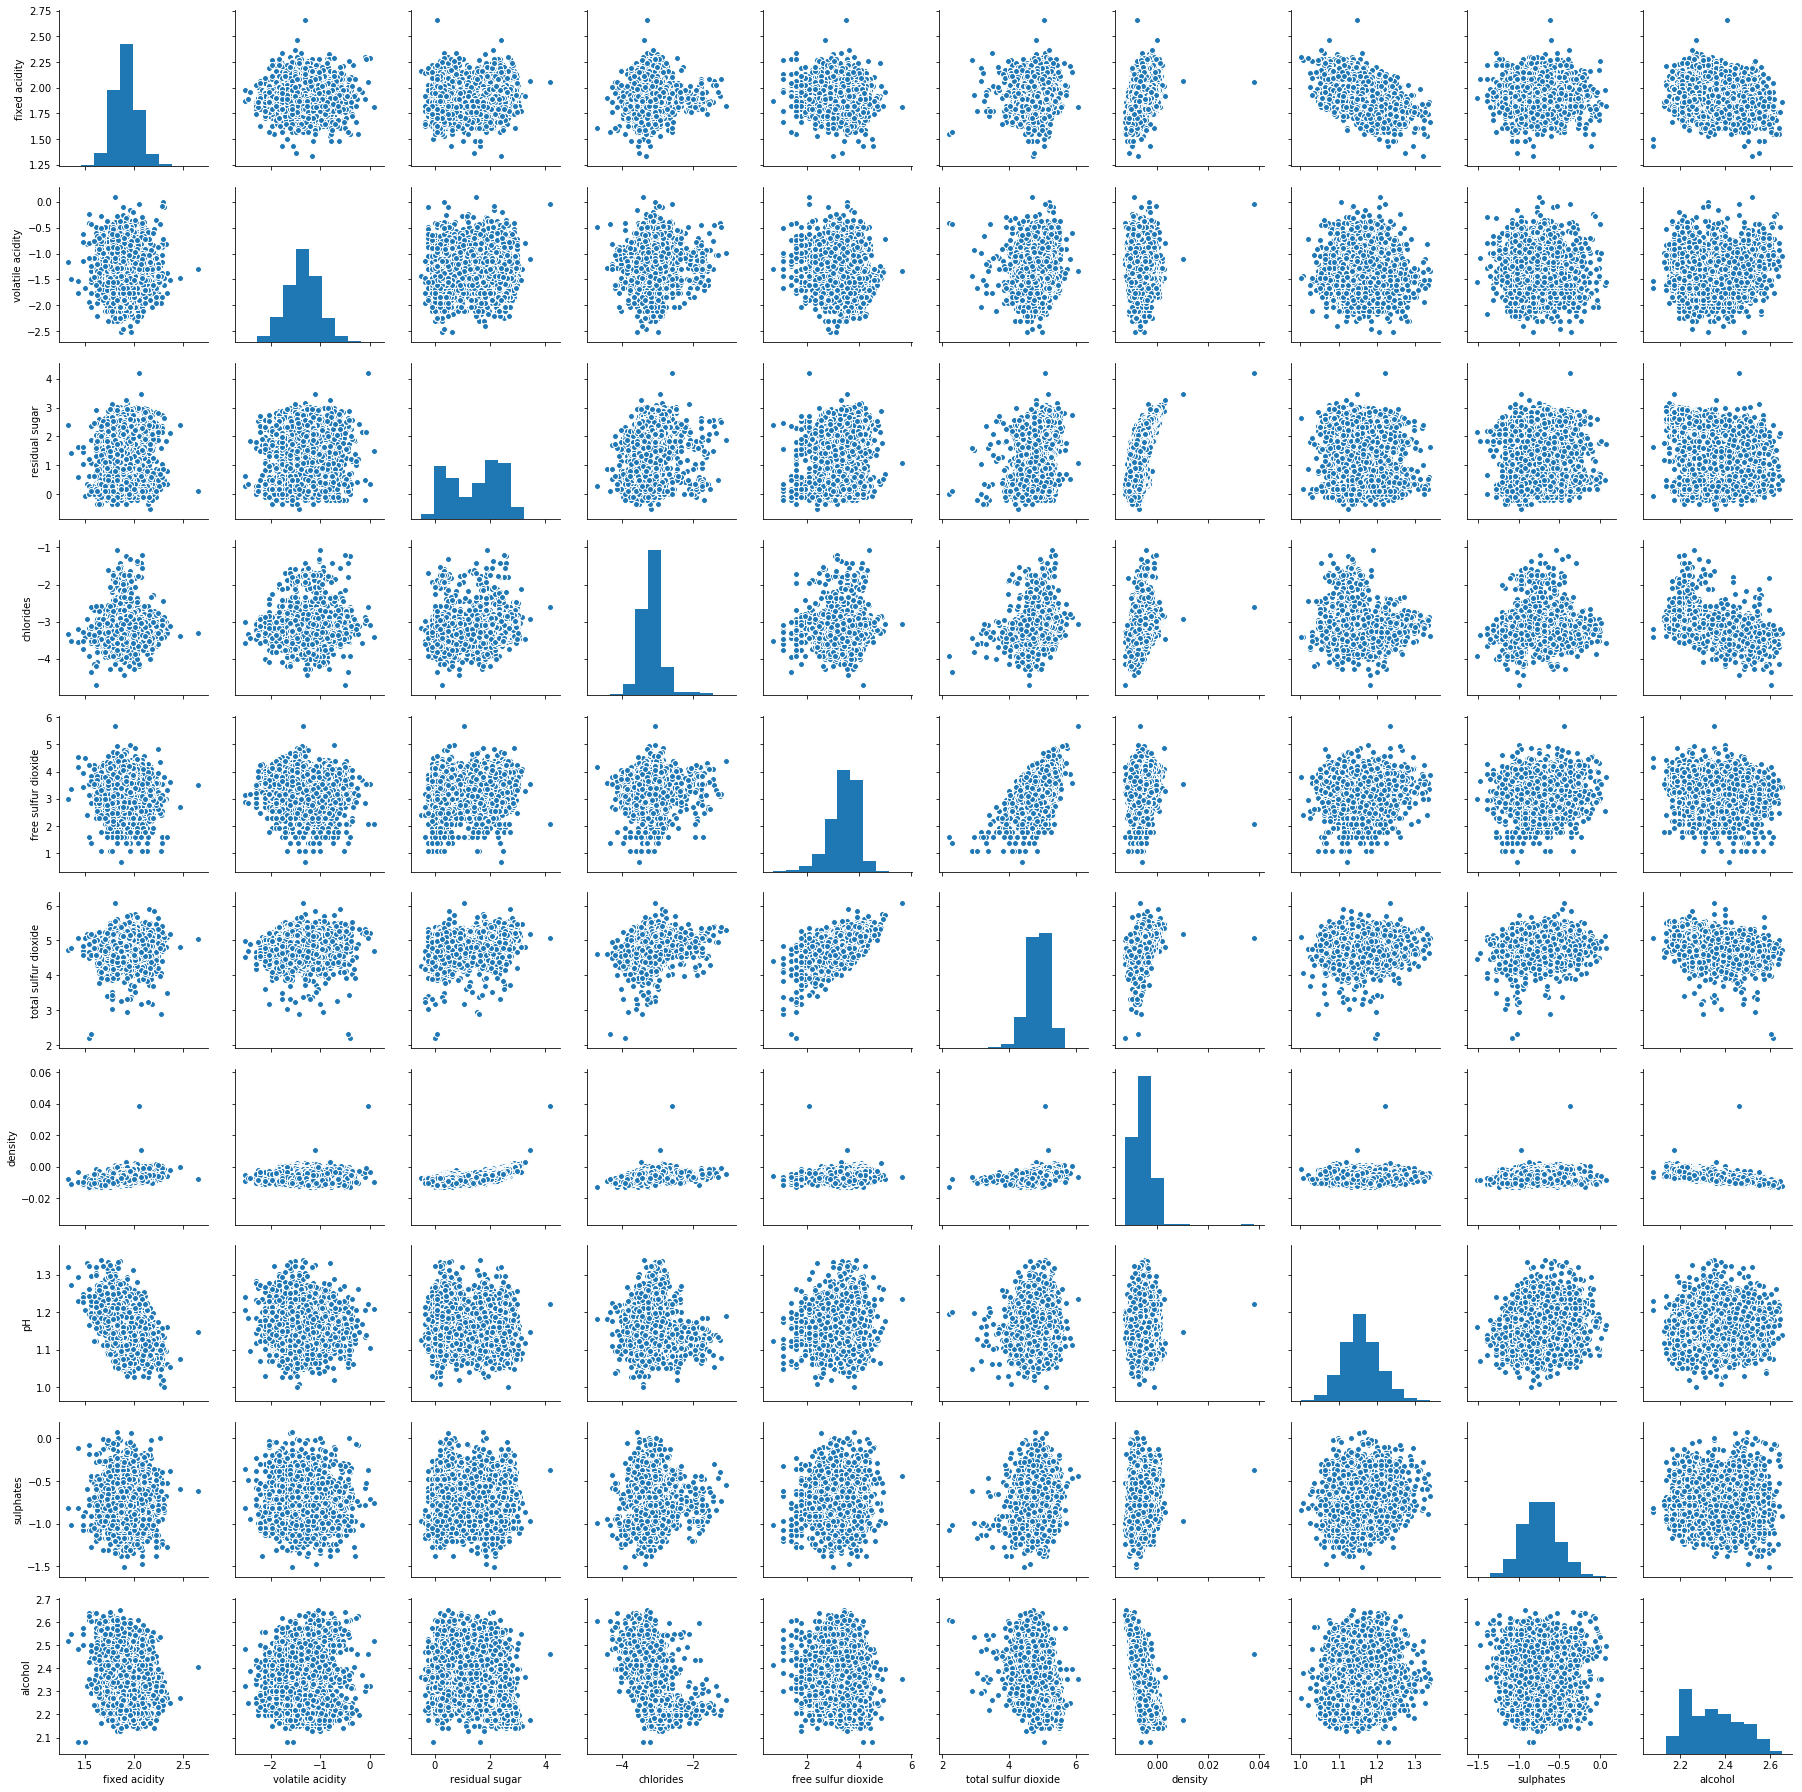

In [191]:
sns.pairplot(data_log)

In [248]:
cross_val = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
prediction_val = cross_val_predict(model, data_log, label_normal, cv=10)

print(confusion_matrix_report(label_normal, prediction_val))
print(accuracy_score(label_normal, prediction_val))
print(classification_report(label_normal, prediction_val))

           __________Prediction__________
             1 - low 2 - middle   3 - high
   1 - low         8         54          1
2 - middle        29       1470         19
  3 - high         0         16          2

0.9255784865540964
             precision    recall  f1-score   support

    1 - low       0.22      0.13      0.16        63
 2 - middle       0.95      0.97      0.96      1518
   3 - high       0.09      0.11      0.10        18

avg / total       0.92      0.93      0.92      1599



In [249]:
k_fold = KFold(len(label_normal), shuffle=True, random_state=0)
clf = GaussianNB()

prediction_val = cross_val_predict(clf, data_log, label_normal, cv=k_fold, n_jobs=1)

print(confusion_matrix_report(label_normal, prediction_val))
print(accuracy_score(label_normal, prediction_val))
print(classification_report(label_normal, prediction_val))

           __________Prediction__________
             1 - low 2 - middle   3 - high
   1 - low         5         58          0
2 - middle        28       1464         26
  3 - high         0         17          1

0.9193245778611632
             precision    recall  f1-score   support

    1 - low       0.15      0.08      0.10        63
 2 - middle       0.95      0.96      0.96      1518
   3 - high       0.04      0.06      0.04        18

avg / total       0.91      0.92      0.91      1599



### PCA

In [250]:
#Applying the PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2 )
data_pca = pca.fit_transform(data_class)
explained_variance = pca.explained_variance_ratio_

In [251]:
k_fold = KFold(len(label_normal), shuffle=True, random_state=0)
clf = GaussianNB()

prediction_val = cross_val_predict(clf, data_pca, label_normal, cv=k_fold, n_jobs=1)

print(confusion_matrix_report(label_normal, prediction_val))
print(accuracy_score(label_normal, prediction_val))
print(classification_report(label_normal, prediction_val))

           __________Prediction__________
             1 - low 2 - middle   3 - high
   1 - low         0         63          0
2 - middle         0       1518          0
  3 - high         0         18          0

0.949343339587242
             precision    recall  f1-score   support

    1 - low       0.00      0.00      0.00        63
 2 - middle       0.95      1.00      0.97      1518
   3 - high       0.00      0.00      0.00        18

avg / total       0.90      0.95      0.92      1599



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Trying to remove highly correlated features

In [255]:
data_corrout = deepcopy(red)
data_corrout.pop("free sulfur dioxide")
data_corrout.pop("pH")
data_corrout.pop("density")
data_corrout.pop("quality")
data_corrout.pop("citric acid")
data_corrout.pop("fixed acidity")
data_corrout.pop("residual sugar")
#data_corrout.pop("chlorides")
#data_corrout.pop("total sulfur dioxide")
#data_corrout.pop("sulphates")
#data_corrout.pop("volatile acidity")

0        1.9
1        2.6
2        2.3
3        1.9
4        1.9
5        1.8
6        1.6
7        1.2
8        2.0
9        6.1
10       1.8
11       6.1
12       1.6
13       1.6
14       3.8
15       3.9
16       1.8
17       1.7
18       4.4
19       1.8
20       1.8
21       2.3
22       1.6
23       2.3
24       2.4
25       1.4
26       1.8
27       1.6
28       1.9
29       2.0
        ... 
1569     1.9
1570     2.2
1571     2.2
1572     2.2
1573     2.4
1574    13.9
1575     2.2
1576     1.6
1577     5.1
1578     1.8
1579     1.7
1580     2.4
1581     1.7
1582     2.6
1583     2.1
1584     2.4
1585     2.6
1586     2.4
1587     1.8
1588     2.5
1589     7.8
1590     1.8
1591     1.7
1592     2.3
1593     1.9
1594     2.0
1595     2.2
1596     2.3
1597     2.0
1598     3.6
Name: residual sugar, Length: 1599, dtype: float64

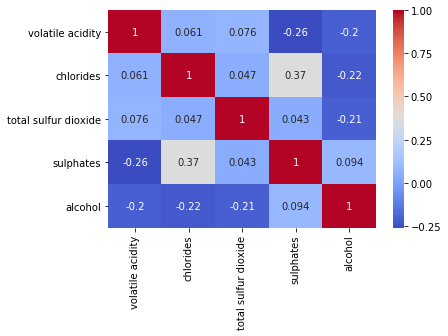

In [145]:
sns.heatmap(data_corrout.corr(),cmap='coolwarm',annot=True)

In [257]:
k_fold = KFold(len(label_normal), shuffle=True, random_state=0)
clf = GaussianNB()

prediction_val = cross_val_predict(clf, data_corrout, label_normal, cv=k_fold, n_jobs=1)

print(confusion_matrix_report(label_normal, prediction_val))
print(accuracy_score(label_normal, prediction_val))
print(classification_report(label_normal, prediction_val))

           __________Prediction__________
             1 - low 2 - middle   3 - high
   1 - low         6         57          0
2 - middle        34       1455         29
  3 - high         0         15          3

0.9155722326454033
             precision    recall  f1-score   support

    1 - low       0.15      0.10      0.12        63
 2 - middle       0.95      0.96      0.96      1518
   3 - high       0.09      0.17      0.12        18

avg / total       0.91      0.92      0.91      1599



In [198]:
data_log_corrout = np.log(data_corrout)

k_fold = KFold(len(label_normal), shuffle=True, random_state=0)
clf = GaussianNB()

prediction_val = cross_val_predict(clf, data_log_corrout, label_normal, cv=k_fold, n_jobs=1)

print(confusion_matrix_report(label_normal, prediction_val))
print(accuracy_score(label_normal, prediction_val))
print(classification_report(label_normal, prediction_val))

           __________Prediction__________
             1 - low 2 - middle   3 - high
   1 - low        19        164          0
2 - middle        55       4458         22
  3 - high         0        176          4

0.9148632094732544
             precision    recall  f1-score   support

    1 - low       0.26      0.10      0.15       183
 2 - middle       0.93      0.98      0.96      4535
   3 - high       0.15      0.02      0.04       180

avg / total       0.88      0.91      0.89      4898



### Mit normalised/standardised data

In [6]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
data_normalised = pd.DataFrame(
    preprocessing.MinMaxScaler().fit_transform(data_normal),
    columns=["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"
]
)


In [259]:
k_fold = KFold(len(label_normal), shuffle=True, random_state=0)
clf = GaussianNB()

prediction_val = cross_val_predict(clf, data_normalised, label_normal, cv=k_fold, n_jobs=1)

print(confusion_matrix_report(label_normal, prediction_val))
print(accuracy_score(label_normal, prediction_val))
print(classification_report(label_normal, prediction_val))

           __________Prediction__________
             1 - low 2 - middle   3 - high
   1 - low        13         49          1
2 - middle        59       1407         52
  3 - high         0         15          3

0.8899312070043778
             precision    recall  f1-score   support

    1 - low       0.18      0.21      0.19        63
 2 - middle       0.96      0.93      0.94      1518
   3 - high       0.05      0.17      0.08        18

avg / total       0.92      0.89      0.90      1599



Leider mies

### Techniques to deal with unbalanced data

https://www.quora.com/In-classification-how-do-you-handle-an-unbalanced-training-set:

1. Random Forests w/ SMOTE Boosting: Use a hybrid SMOTE that undersamples the majority class and generates synthetic samples for the minority class by adjustable percentages. Select these percentages depending on the distribution of your response variable in the training set. Feed this data to your RF model. Always cross-validate/perform gird-search to find the best parameter settings for your RFs

2. XGBoost w/ hyper-parameter optimisation: Again, cross-validate or perform gird-search to find the best parameter settings for the model. I found this post extremely useful in my case. Additionally, xgboost offers parameters to balance positive and negative weights using scale_pos_weight. See the parameter documentation for a complete list.

3. Support Vector Machines w/ Cost Sensitive Training:
    - SVMs allow for some degree of mis-classification of data and then repeatedly optimizes a loss function to find the required “best fit” model.
    - It controls the complexity using a cost function that increases the penalty if samples are on the incorrect side of the current class boundary. 
    - For class imbalances, unequal costs for each class can adjust the parameters to increase or decrease the sensitivity of the model to particular classes.
    
Furthermore:
- Understand your data.
- Do not use % accuracy as a metric, use AUC, Sensitivity-Specificity and Cohen’s Kappa scores instead.
- Run a lot of tests on multiple models.

https://towardsdatascience.com/dealing-with-imbalanced-classes-in-machine-learning-d43d6fa19d2:

- In situations where we want to detect instances of a minority class, we are usually concerned more so with recall than precision
- Cost-sensitive learning
- Oversampling: Problem of overfitting
- Undersampling: Problem of leaving out important instances and too few data
- SMOTE: Creates new instances of minority class by forming convex combinations of neighboring instances
- anomaly detection methods: for extreme inbalances

https://elitedatascience.com/imbalanced-classes

https://shiring.github.io/machine_learning/2017/04/02/unbalanced

https://www.analyticsvidhya.com/blog/2017/03/imbalanced-classification-problem/

https://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html

https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

### Oversampling (not finished)
https://elitedatascience.com/imbalanced-classes

In [9]:
from sklearn.utils import resample
class_sample = deepcopy(red)


# Separate classes
class3 = class_sample["quality"]==3
class4 = class_sample["quality"]==4
class5 = class_sample["quality"]==5
class6 = class_sample["quality"]==6
class7 = class_sample["quality"]==7
class8 = class_sample["quality"]==8

# Upsample minority class
class3_upsampled = resample(class3, 
                                 replace=True,     # sample with replacement
                                 n_samples=681,    # to match majority class
                                 random_state=123) # reproducible results
class4_upsampled = resample(class4, 
                                 replace=True,     # sample with replacement
                                 n_samples=681,    # to match majority class
                                 random_state=123) # reproducible results
class6_upsampled = resample(class6, 
                                 replace=True,     # sample with replacement
                                 n_samples=681,    # to match majority class
                                 random_state=123) # reproducible results
class7_upsampled = resample(class7, 
                                 replace=True,     # sample with replacement
                                 n_samples=681,    # to match majority class
                                 random_state=123) # reproducible results
class8_upsampled = resample(class8, 
                                 replace=True,     # sample with replacement
                                 n_samples=681,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority classes
data_upsampled = pd.concat([class5, class3_upsampled, class4_upsampled, class6_upsampled, class7_upsampled, class8_upsampled])

data_upsampled.value_counts()

False    3923
True     1081
Name: quality, dtype: int64

In [10]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(data_normal, label_normal)
#>>> from collections import Counter
#>>> print(sorted(Counter(y_resampled).items()))
#[(0, 4674), (1, 4674), (2, 4674)]

AttributeError: 'RandomOverSampler' object has no attribute 'fit_resample'

In [38]:
from skmultilearn.problem_transform import LabelPowerset
from imblearn.over_sampling import RandomOverSampler

X = deepcopy(data_normal)
y = deepcopy(label_normal)

lp = LabelPowerset()
ros = RandomOverSampler(random_state=42)

# Applies the above stated multi-label (ML) to multi-class (MC) transformation.
yt = lp.transform(y)

X_resampled, y_resampled = ros.fit_sample(X, yt)

# Inverts the ML-MC transformation to recreate the ML set
y_resampled = lp.inverse_transform(y_resampled)

AttributeError: 'Series' object has no attribute 'reshape'

In [45]:
red["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### SMOTE (unfinished)

https://www.kaggle.com/qianchao/smote-with-imbalance-data

In [31]:
X = np.array(red.ix[:, red.columns != 'quality'])
y = np.array(red.ix[:, red.columns == 'quality'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (1599, 11)
Shape of y: (1599, 1)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [69]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

NameError: name 'X' is not defined

In [34]:
print("Before OverSampling, counts of label '3': {}".format(sum(y_train==3)))
print("Before OverSampling, counts of label '8': {} \n".format(sum(y_train==8)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '3': {}".format(sum(y_train_res==3)))
print("After OverSampling, counts of label '8': {}".format(sum(y_train_res==8)))

Before OverSampling, counts of label '3': [7]
Before OverSampling, counts of label '8': [13] 

After OverSampling, the shape of train_X: (2838, 11)
After OverSampling, the shape of train_y: (2838,) 

After OverSampling, counts of label '3': 473
After OverSampling, counts of label '8': 473


In [35]:
model = GaussianNB().fit(X_train_res, y_train_res)
prediction = model.predict(X_test)

print(confusion_matrix(y_test, prediction))  
print(classification_report(y_test, prediction)) 

[[ 0  0  2  1  0  0]
 [ 5  2  4  3  1  0]
 [33 35 75 39 21  5]
 [29 23 29 37 50 36]
 [ 2  1  0 10 18 14]
 [ 0  0  0  1  3  1]]
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         3
          4       0.03      0.13      0.05        15
          5       0.68      0.36      0.47       208
          6       0.41      0.18      0.25       204
          7       0.19      0.40      0.26        45
          8       0.02      0.20      0.03         5

avg / total       0.49      0.28      0.34       480



# Random Forest Classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE
import sklearn as sk
from sklearn import svm
import graphviz 
from sklearn.utils.multiclass import unique_labels
from sklearn import tree

In [8]:
k_fold = KFold(len(label_normal), shuffle=True, random_state=0)

rfc = RandomForestClassifier(n_estimators=25, random_state=12)

prediction_val = cross_val_predict(rfc, data_normal, label_normal, cv=k_fold, n_jobs=1)

print(confusion_matrix_report(label_normal, prediction_val))
print(accuracy_score(label_normal, prediction_val))
print(classification_report(label_normal, prediction_val))

      ____________Prediction_____________
         3     4     5     6     7     8     9
    3    0     0     9    10     1     0     0
    4    0    26    94    40     3     0     0
    5    0    13   962   459    23     0     0
    6    0     5   336  1690   163     4     0
    7    0     2    25   390   458     5     0
    8    0     0     3    63    51    58     0
    9    0     0     0     3     2     0     0

0.6521028991425072
             precision    recall  f1-score   support

          3       0.00      0.00      0.00        20
          4       0.57      0.16      0.25       163
          5       0.67      0.66      0.67      1457
          6       0.64      0.77      0.70      2198
          7       0.65      0.52      0.58       880
          8       0.87      0.33      0.48       175
          9       0.00      0.00      0.00         5

avg / total       0.65      0.65      0.64      4898



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Parameter Tuning
https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from scipy.stats import chi2_contingency
import re
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV


In [10]:
# Look at parameters used by the current forest
print('Parameters currently in use:\n')
pprint(rfc.get_params())


Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 25,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 12,
 'verbose': 0,
 'warm_start': False}


In [11]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [12]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 10 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(data_normal, label_normal)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 30.6min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 47.7min finished


RandomizedSearchCV(cv=10, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [13]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [10]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 30],
    'max_features': ["sqrt"],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [2, 3],
    'n_estimators': [1400, 1600, 1800, 2000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [27]:
# Fit the grid search to the data
grid_search.fit(data_normal, label_normal)
grid_search.best_params_


Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.1min


KeyboardInterrupt: 

In [31]:
k_fold = KFold(len(label_normal), shuffle=True, random_state=0)
model = RandomForestClassifier()

model.fit(data_normal, label_normal)

prediction_val = cross_val_predict(model, data_normal, label_normal, cv=k_fold, n_jobs=1)

print(confusion_matrix_report(label_normal, prediction_val))
print(accuracy_score(label_normal, prediction_val))
print(classification_report(label_normal, prediction_val))

      ____________Prediction_____________
         3     4     5     6     7     8     9
    3    0     1     7    12     0     0     0
    4    0    31    83    47     2     0     0
    5    1    25   964   446    21     0     0
    6    0    14   380  1621   179     4     0
    7    0     1    35   388   453     3     0
    8    0     0     8    61    49    57     0
    9    0     0     1     3     1     0     0

0.6382196815026542
             precision    recall  f1-score   support

          3       0.00      0.00      0.00        20
          4       0.43      0.19      0.26       163
          5       0.65      0.66      0.66      1457
          6       0.63      0.74      0.68      2198
          7       0.64      0.51      0.57       880
          8       0.89      0.33      0.48       175
          9       0.00      0.00      0.00         5

avg / total       0.64      0.64      0.63      4898



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
data_normal.groupby("quality").mean()

In [267]:
rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(data_normal, label_normal)

CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 200}

In [275]:
k_fold = KFold(len(label_normal), shuffle=True, random_state=0)
model = RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=6, criterion='gini')

model.fit(data_normal, label_normal)

prediction_val = cross_val_predict(model, data_normal, label_normal, cv=k_fold, n_jobs=1)

print(confusion_matrix_report(label_normal, prediction_val))
print(accuracy_score(label_normal, prediction_val))
print(classification_report(label_normal, prediction_val))

      ____________Prediction_____________
         3     4     5     6     7     8     9
    3    0     0     7    13     0     0     0
    4    0     2    91    69     1     0     0
    5    0     0   821   629     7     0     0
    6    0     0   374  1729    95     0     0
    7    0     0    26   655   199     0     0
    8    0     0     0   135    40     0     0
    9    0     0     0     3     2     0     0

0.5616578195181707
             precision    recall  f1-score   support

          3       0.00      0.00      0.00        20
          4       1.00      0.01      0.02       163
          5       0.62      0.56      0.59      1457
          6       0.53      0.79      0.64      2198
          7       0.58      0.23      0.33       880
          8       0.00      0.00      0.00       175
          9       0.00      0.00      0.00         5

avg / total       0.56      0.56      0.52      4898



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [29]:
k_fold = KFold(len(label_normal), shuffle=True, random_state=0)

model = rf_random.best_estimator_
#model.fit(train_data, train_label)

prediction_val = cross_val_predict(model, data_normal, label_normal, cv=k_fold, n_jobs=1)

print(confusion_matrix_report(label_normal, prediction_val))
print(accuracy_score(label_normal, prediction_val))
print(classification_report(label_normal, prediction_val))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [13]:
k_fold = KFold(len(label_normal), shuffle=True, random_state=0)

clf = svm.SVC(C=0.3, gamma=0.01, cache_size=5000,
              decision_function_shape='ovo', class_weight='balanced')
              #class_weight={'1 - low':50, '3 - high':50})
    
prediction_val = cross_val_predict(clf, data_normal, label_class, cv=k_fold, n_jobs=1)

print(confusion_matrix_report(label_class, prediction_val))
print(accuracy_score(label_class, prediction_val))
print(classification_report(label_class, prediction_val))

           __________Prediction__________
             1 - low 2 - middle   3 - high
   1 - low        95         77         11
2 - middle       882       2470       1183
  3 - high        17         46        117

0.5475704369130258
             precision    recall  f1-score   support

    1 - low       0.10      0.52      0.16       183
 2 - middle       0.95      0.54      0.69      4535
   3 - high       0.09      0.65      0.16       180

avg / total       0.89      0.55      0.65      4898



In [207]:
k_fold = KFold(len(label_normal), shuffle=True, random_state=0)

model = RandomForestClassifier(n_estimators=25, random_state=12)
#model.fit(train_data, train_label)

prediction_val = cross_val_predict(model, data_normal, label_class, cv=k_fold, n_jobs=1)

print(confusion_matrix_report(label_class, prediction_val))
print(accuracy_score(label_class, prediction_val))
print(classification_report(label_class, prediction_val))

           __________Prediction__________
             1 - low 2 - middle   3 - high
   1 - low        33        150          0
2 - middle        16       4512          7
  3 - high         0        125         55

0.9391588403429971
             precision    recall  f1-score   support

    1 - low       0.67      0.18      0.28       183
 2 - middle       0.94      0.99      0.97      4535
   3 - high       0.89      0.31      0.45       180

avg / total       0.93      0.94      0.92      4898



## Combining classifiers

In [208]:
k_fold = KFold(len(label_normal), shuffle=True, random_state=0)

Random_Forest = RandomForestClassifier(n_estimators=25, random_state=12)
Gaussian_Naive_Bayes = GaussianNB()
Support_Vector_Machine = svm.SVC(gamma=0.01, decision_function_shape='ovo')
Decision_tree = tree.DecisionTreeClassifier(max_depth=4, min_samples_split=10)


models = [Random_Forest, Gaussian_Naive_Bayes, Support_Vector_Machine, Decision_tree]

for i in models:
    prediction_val = cross_val_predict(i, data_normal, label_normal, cv=k_fold, n_jobs=1)
    print("Model")
    print(classification_report(label_normal, prediction_val))

Model
             precision    recall  f1-score   support

    1 - low       0.67      0.18      0.28       183
 2 - middle       0.94      0.99      0.97      4535
   3 - high       0.89      0.31      0.45       180

avg / total       0.93      0.94      0.92      4898

Model
             precision    recall  f1-score   support

    1 - low       0.24      0.27      0.25       183
 2 - middle       0.94      0.92      0.93      4535
   3 - high       0.15      0.22      0.18       180

avg / total       0.88      0.87      0.88      4898

Model
             precision    recall  f1-score   support

    1 - low       0.75      0.02      0.03       183
 2 - middle       0.93      1.00      0.96      4535
   3 - high       0.00      0.00      0.00       180

avg / total       0.89      0.93      0.89      4898

Model
             precision    recall  f1-score   support

    1 - low       0.37      0.14      0.20       183
 2 - middle       0.93      0.99      0.96      4535
   3 - high 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### ordinal technique
https://pythonhosted.org/mord/reference.html#mord.MulticlassLogistic

In [209]:
train_data, test_data, train_label, test_label = train_test_split(data_normal, label_normal, test_size=0.10)

model = RandomForestClassifier(n_estimators=25, random_state=12)
model.fit(train_data, train_label)
prediction = model.predict(test_data)


In [14]:
import mord as m
c = m.LogisticIT() #Default parameters: alpha=1.0, verbose=0, maxiter=10000
c.fit(train_data, train_label)
prediction = c.predict(test_data)

print(classification_report(test_label, prediction)) 

NameError: name 'train_data' is not defined

In [15]:
k_fold = KFold(len(label_normal), shuffle=True, random_state=0)

model = m.LogisticIT()

prediction_val = cross_val_predict(model, data_normal, label_normal, cv=k_fold, n_jobs=1)

print(confusion_matrix_report(label_normal, prediction_val))
print(accuracy_score(label_normal, prediction_val))
print(classification_report(label_normal, prediction_val))

      ____________Prediction_____________
         3     4     5     6     7     8     9
    3    0     0     8    11     1     0     0
    4    1     2    88    71     1     0     0
    5    0     0   682   768     7     0     0
    6    0     0   344  1742   111     1     0
    7    0     0    49   682   147     2     0
    8    0     0    12   111    52     0     0
    9    0     0     0     3     2     0     0

0.5253164556962026
             precision    recall  f1-score   support

          3       0.00      0.00      0.00        20
          4       1.00      0.01      0.02       163
          5       0.58      0.47      0.52      1457
          6       0.51      0.79      0.62      2198
          7       0.46      0.17      0.24       880
          8       0.00      0.00      0.00       175
          9       0.00      0.00      0.00         5

avg / total       0.52      0.53      0.48      4898



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Zu klärende Fragen

- Wie ist euer performance measure für die Algorithmen für rot und Weißwein? Was habt ihr ausprobiert?
- Welche Klassen wollen wir verwenden? Alle? Zusammenfassen? Evt. verschiedene binary classes daraus machen? 
- Welchen Split verwenden wir? LOOCV?
- Wie gehen wir mit unbalanced Data um? Oversampling? SMOTE?
- Welche Feature Engineering Operationen sind sinnvoll?
- 